In [1]:
import pandas as pd 
import seaborn as sns

In [42]:
df = sns.load_dataset('tips')

In [3]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


<Axes: >

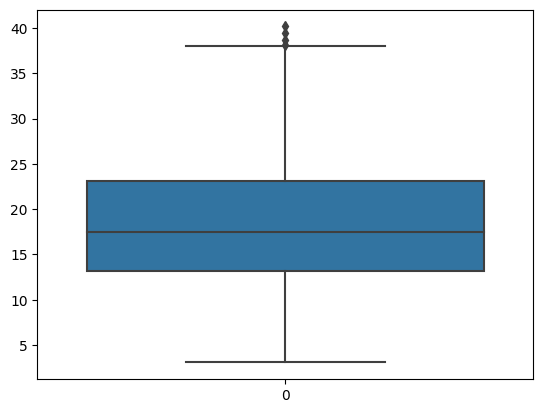

In [58]:
sns.boxplot(df2['total_bill'])

In [5]:
# 이상치와 경계 부분을 수치화

import numpy as np

In [6]:
q1, q3 = np.percentile(df['total_bill'], [25,75])
print(q1, q3)

13.3475 24.127499999999998


In [45]:
# 상단의 경계 (q3 + (iqr + 1.5))
# iqr = q3 - q1

iqr = q3 - q1
iqr

10.779999999999998

In [46]:
    # 상단의 이상치 경계
upper_bound = q3 +1.5*iqr
upper_bound

40.29749999999999

In [47]:
# 하단의 이상치 경계
# q1 - (iqr *1.5)
lower_bound = q1 -1.5*iqr
lower_bound

-2.8224999999999945

In [54]:
df.loc[(df['total_bill'] <= upper_bound) & (df['total_bill'] >= lower_bound)]

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [55]:
def outlier(df, col):
    q1, q3 = np.percentile(df[col], [25,75])
    iqr = q3 - q1 
    upper_bound = q3 + 1.5*iqr
    lower_bound = q1 - 1.5*iqr
    
    result = np.where((df[col] <= upper_bound) & (df[col] >= lower_bound))
    return df.loc[result]    
    
    
    
    
    

In [57]:
df2 = outlier(df, 'total_bill')